<a name="modes"></a>
# Range Modes

#### In `range_df()`, as well as in `plot()` and `range_animate()` where it is called,<br> We can choose the method for building the OHLCV Range Dataframe, there are **2 modes available**:

  - `"normal"`: Standard Range. *(default)*
  - `"wicks"`: Standard Range with Wicks.

The advantage is that we can have multiple dataframes of different modes from the same instance.

### Let's take a closer look at these modes

In [1]:
# This allows multiple outputs from a single jupyter notebook cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import pandas as pd
import mplfinance as mpf

from rangedf import Range

In [3]:
df_ticks = pd.read_parquet('data/EURGBP_T1_cT.parquet')
df_ticks.rename(columns={'bid': 'close'}, inplace=True)

r = Range(df_ticks, 0.0003)

all_modes = ['normal', 'nongap']
dfs = []
for mode in all_modes:
    df = r.range_df(mode)
    dfs.append(
        df.loc[(df.index <= '2025-05-12 21:05:35.240000')]
    )

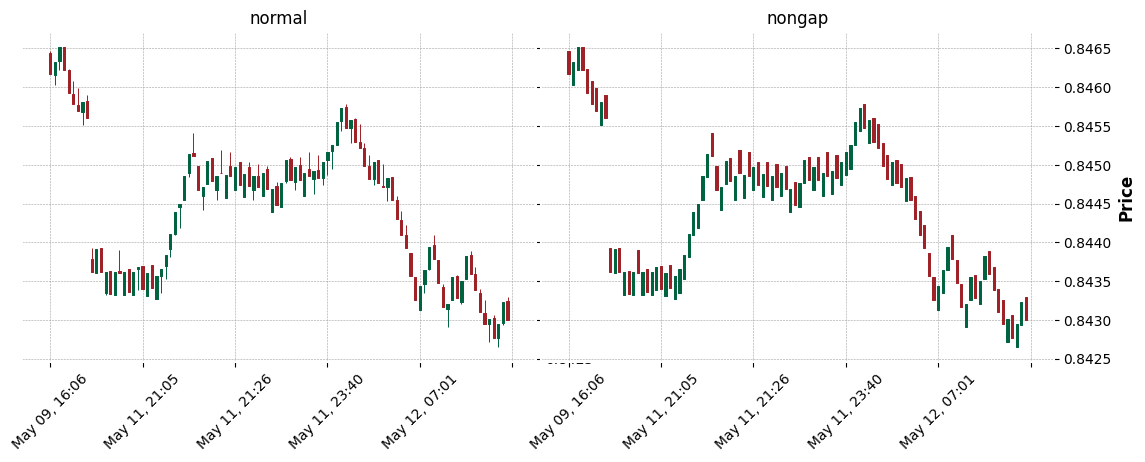

In [4]:
fig = mpf.figure(style='charles', figsize=(20,9))
fig.subplots_adjust(hspace=0.1, wspace=0.01)

index = df.index.get_loc('2025-05-11 21:05:35.240000')

axs = []
for i in range(1, 3):
    axs.append(fig.add_subplot(2,3,i))

for ax, df, mode in zip(axs, dfs[:3], all_modes[:3]):
    df = df.iloc[index-20:index+80]
    mpf.plot(df,type='candle',ax=ax,axtitle=mode)

mpf.show()

### With *keep_inner_gap=True*, any gaps that occur during the formation will result into a price expansion of the range bar, **there is no limit for expansion.**
Useful to reduce the gaps between bars as much as possible

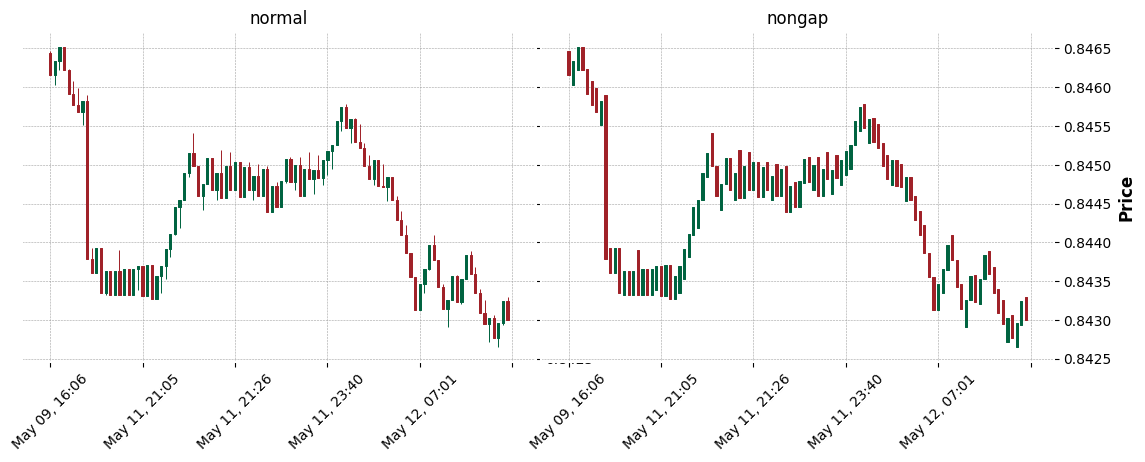

In [5]:
r2 = Range(df_ticks, 0.0003, keep_inner_gap=True)

dfs = []
for mode in all_modes:
    df = r2.range_df(mode)
    dfs.append(
        df.loc[(df.index <= '2025-05-12 21:05:35.240000')]
    )

fig = mpf.figure(style='charles', figsize=(20,9))
fig.subplots_adjust(hspace=0.1, wspace=0.01)

index = df.index.get_loc('2025-05-11 21:05:35.240000')

axs = []
for i in range(1, 3):
    axs.append(fig.add_subplot(2,3,i))

for ax, df, mode in zip(axs, dfs[:3], all_modes[:3]):
    df = df.iloc[index-20:index+80]
    mpf.plot(df,type='candle',ax=ax,axtitle=mode)

mpf.show()